In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [228]:
from IPython.display import clear_output

In [971]:
class maze:
    def __init__(self,maze_layout,start,goal):
        self.init_maze_layout = maze_layout
        self.maze_layout = maze_layout
        self.start = start
        self.goal = goal
        self.dimensions = maze_layout.shape
        self.location = np.array(start)
        self.action_space = [np.array([-1,0]),# move up
                             np.array([1,0]), # move down
                             np.array([0,1]), # move right
                            np.array([0,-1])]# move left
    def show_maze(self):
        plt.imshow(self.maze_layout)
        plt.text(self.start[1],self.start[0],'Start',ha='center',va='center',c = 'red')
        plt.text(self.goal[1],self.goal[0],'Goal',ha = "center",va="center",c='red')
        plt.show(block = False)
        
    def move(self, action, location, validity = False):
        new_location = location + action
        if not validity:
            if 0<=new_location[0]<self.dimensions[0] and 0<= new_location[1]<self.dimensions[1] and maze_layout[new_location[0],new_location[1]]!= 1 :
                        self.maze_layout[self.location[0],self.location[1]] = 0
                        self.maze_layout[new_location[0],new_location[1]] = 2
                        self.location = new_location
        else:
            if 0<=new_location[0]<self.dimensions[0] and 0<= new_location[1]<self.dimensions[1] and maze_layout[new_location[0],new_location[1]]!= 1 :
                return True
            else:
                return False
    def reset(self):
        self.maze_layout = self.init_maze_layout
        self.start = self.start
        self.goal = self.goal
        self.dimensions = self.init_maze_layout.shape
        self.location = np.array(self.start)     

In [972]:
class agent:
    def __init__(self,maze,learning_rate=0.1,discount_factor=0.9,exploration=0.1,num_episodes=100,goal_reward=0,
                step_reward= -1, penality_reward = -5):
        self.alpha = learning_rate
        self.e     = exploration
        self.gamma = discount_factor
        self.num_episodes = num_episodes
        self.q_table = np.zeros((maze.dimensions[0],maze.dimensions[1],4))
        self.step_reward = step_reward
        self.goal_reward = goal_reward
        self.penality_reward = penality_reward
        
    def get_action(self,state):
        if np.random.rand()<self.e:
            action = np.random.randint(4)
        else:
            action = np.argmax(self.q_table[state[0]][state[1]])
        return action
    def get_reward(self,state,valid):
        if valid:
            if maze.location[0] == maze.goal[0] and maze.location[1] == maze.goal[1]:
                reward = self.goal_reward
            else:
                reward = self.step_reward
        else:
            reward = self.penality_reward
        return reward
    def update_qtable(self,state,action,new_state,reward):
        
        next_best_action = self.get_action(new_state)
        current_q_value = self.q_table[state[0]][state[1]][action]
        
        new_q_value = current_q_value + self.alpha * (reward + self.gamma * self.q_table[new_state[0]][new_state[1]][next_best_action] - current_q_value)
        
        self.q_table[state[0]][state[1]][action] = new_q_value

        
        
        

In [966]:
def episode(agent,maze,train = True):
    current_state = maze.start
    isdone = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]
    actions = []
    while not isdone:
        curr_state = maze.location
        action = agent.get_action(maze.location)
        actions.append(action)
        valid = maze.move(maze.action_space[action],maze.location,validity = True)
        if valid:
            maze.move(maze.action_space[action],maze.location)
        next_state = maze.location
        reward = agent.get_reward(maze.location,valid = valid)
        if reward == agent.goal_reward:
            isdone = True
        if train:
            agent.update_qtable(curr_state,action,next_state,reward)
        
        path.append(maze.location)
        episode_reward += reward
        episode_step += 1
    return actions,episode_reward,episode_step,path


In [967]:
def train_agent(agent, maze, num_episodes=100):
    episode_rewards = []
    episode_steps = []

    for i in range(num_episodes):
        (actions,episode_reward,episode_step,path) = episode(agent, maze, train=True)
        maze.reset()
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)
    print("last actions:")
    print(actions)
    # Plotting the data after training is completed
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is: {average_steps}")

    plt.tight_layout()
    plt.show()
    return actions
print("This code block has been run and the train_agent function is now available for use.")

This code block has been run and the train_agent function is now available for use.


In [973]:
maze_layout = np.array([[0,0,0,1,1,0,0,0,0,0],
                        [0,0,2,0,1,0,0,0,0,0],
                        [1,0,1,1,1,0,1,0,0,0],
                        [0,0,1,1,1,0,1,1,0,1],
                        [0,1,1,1,0,0,0,1,0,1],
                        [0,0,1,0,0,1,1,1,0,0],
                        [1,0,1,0,1,1,0,0,0,0],
                        [0,0,1,0,0,1,1,1,1,1],
                        [0,1,1,1,0,0,0,1,0,0],
                        [0,0,0,0,0,0,0,0,0,0]])
maze = maze(maze_layout,(1,2),(6,6))



agent = agent(maze,0.1,0.9,0.1,100,10,
                -6,-9)

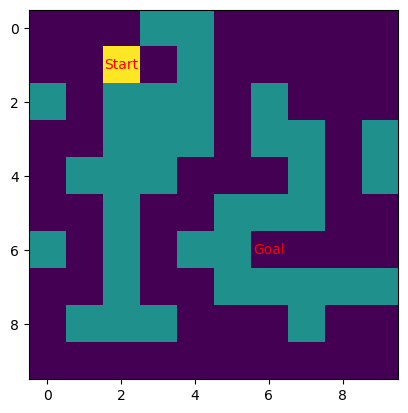

In [969]:
maze.show_maze()

last actions:
[3, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 2, 2, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3]
The average reward is: -450.035
The average steps is: 73.213


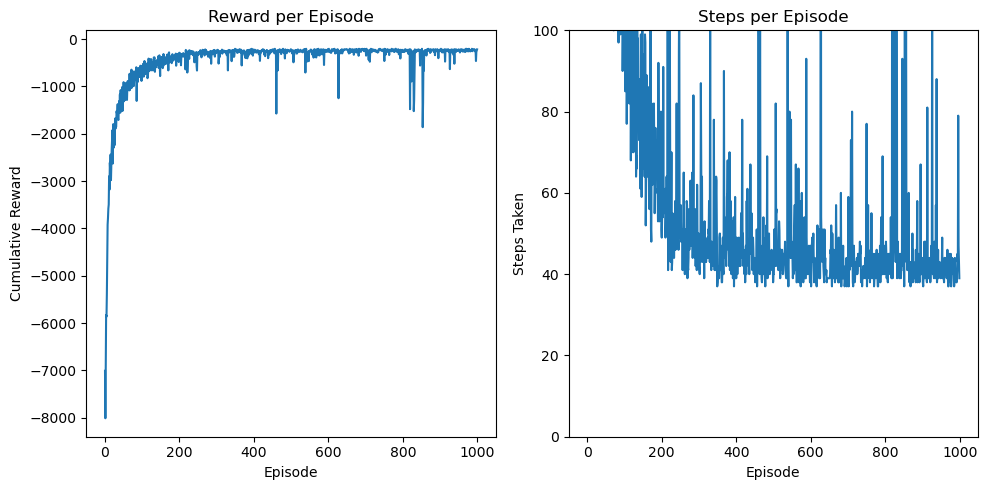

39


In [970]:
actions=train_agent(agent, maze, num_episodes=1000)
print(len(actions))

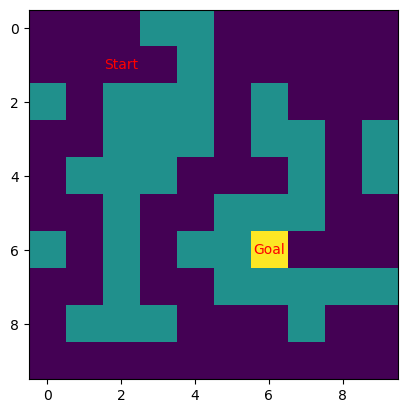

In [974]:

for action in actions:
    plt.pause(0.5)
    clear_output(wait = True)
    maze.move(maze.action_space[action],maze.location)
    plt.imshow(maze.maze_layout)
    plt.text(maze.start[1],maze.start[0],'Start',ha='center',va='center',c = 'red')
    plt.text(maze.goal[1],maze.goal[0],'Goal',ha = "center",va="center",c='red')
    plt.show(block = False)

In [511]:
print(path)

[(0, 0), array([0, 0]), array([0, 1]), array([0, 0]), array([0, 1]), array([1, 1]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([1, 0]), array([2, 0]), array([2, 1]), array([2, 1]), array([2, 0]), array([2, 1]), array([2, 0]), array([2, 1]), array([2, 1]), array([2, 0]), array([1, 0]), array([2, 0]), array([3, 0]), array([3, 0]), array([2, 0]), array([2, 1]), array([2, 1]), array([2, 1]), array([2, 0]), array([2, 1]), array([2, 1]), array([2, 1]), array([2, 0]), array([2, 0]), array([2, 1]), array([1, 1]), array([2, 1]), array([2, 1]), array([2, 1]), array([2, 0]), array([2, 1]), array([2, 1]), array([2, 0]), array([2, 1]), array([2, 1]), array([1, 1]), array([2, 1]), array([2, 0]), array([3, 0]), array([4, 0]), array([3, 0]), array([4, 0]), array([3, 0]), array([3, 0]), array([3, 0]), array([4, 0]), array([4, 0]), array([4, 0]), array([4, 0]), array([4, 0]), array([3, 0]), array([2, 0]), array([1, 0]), array([0, 0]), array([0, 0]), array([0, 0]), array([0, 1]), a